In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [5]:
data = pd.read_csv('cleaned_data.csv')

In [7]:
print(data.head())

   CustomerID Month Of Interaction New/Old Customer         Referral sources  \
0           1                March     Old Customer           Friends/Family   
1           2              January     Old Customer  Social Media Influencer   
2           3             February     New Customer           Friends/Family   
3           4              January     New Customer           Friends/Family   
4           5              January     New Customer           Friends/Family   

  Clothing Section Journey Stage   Touchpoints         Actions  \
0              Men     Awareness       Website  Viewed Product   
1              Men      Purchase       Website   Made Purchase   
2              Men      Purchase    E-Commerce   Made Purchase   
3              Men     Awareness       Website  Viewed Product   
4              Men      Purchase  Social Media   Added to Cart   

             Outcomes      Sales Campaign  Feedback Rating Channels  \
0  Continued Browsing  End of Season Sale          

In [15]:
label_encoder = LabelEncoder()

In [39]:
data['Channels'] = label_encoder.fit_transform(data['Channels'])

In [53]:
data['Clothing Section'] = label_encoder.fit_transform(data['Clothing Section'])

In [65]:
data['New/Old Customer'] = label_encoder.fit_transform(data['New/Old Customer'])

In [67]:
X = data[['Channels', 'Clothing Section', 'New/Old Customer']]

In [27]:
X = X.dropna()

In [69]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [71]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):  # We try clustering from 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

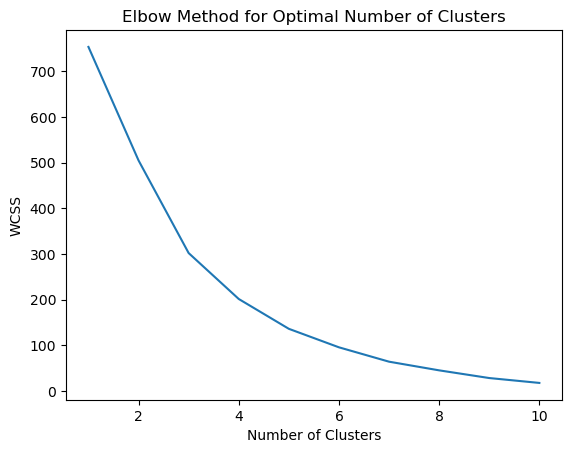

In [73]:
# Plot the Elbow Method to find the optimal number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [75]:
# Based on the Elbow plot, we select the optimal number of clusters (let's assume 3)
optimal_clusters = 3

In [77]:
# Apply KMeans Clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [79]:
# Visualize the clusters using PCA (for dimensionality reduction)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

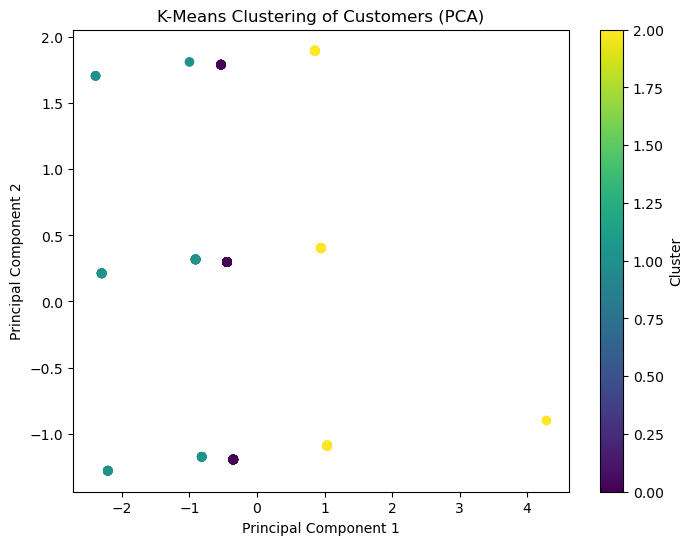

In [81]:
# Scatter plot for PCA-reduced data with cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Cluster'], cmap='viridis')
plt.title('K-Means Clustering of Customers (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [83]:
# Evaluate the clustering result using Silhouette Score
silhouette_avg = silhouette_score(X_scaled, data['Cluster'])
print(f"Silhouette Score for the clustering: {silhouette_avg:.3f}")

Silhouette Score for the clustering: 0.538


In [85]:
# Save the results to a new CSV (optional, for further analysis)
data.to_csv('customer_with_clusters.csv', index=False)